In [392]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [393]:
df = pd.read_csv("NY-House-Dataset.csv")

In [394]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [395]:
# rozmiar ramki
df.shape

(4801, 17)

In [396]:
# podział ramki 
X = df.drop(['PRICE'], axis=1)
y = df["PRICE"]

In [397]:
# podział na zbior do analizy i zbior dla walidatorów
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## **Wstępna analiza**

In [398]:
df_learning = X_train.join(y_train)

In [399]:
df_learning.info()
# brak wartosci null w kazdej kolumnie ramki danych

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3360 entries, 4651 to 2011
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  3360 non-null   object 
 1   TYPE                         3360 non-null   object 
 2   BEDS                         3360 non-null   int64  
 3   BATH                         3360 non-null   float64
 4   PROPERTYSQFT                 3360 non-null   float64
 5   ADDRESS                      3360 non-null   object 
 6   STATE                        3360 non-null   object 
 7   MAIN_ADDRESS                 3360 non-null   object 
 8   ADMINISTRATIVE_AREA_LEVEL_2  3360 non-null   object 
 9   LOCALITY                     3360 non-null   object 
 10  SUBLOCALITY                  3360 non-null   object 
 11  STREET_NAME                  3360 non-null   object 
 12  LONG_NAME                    3360 non-null   object 
 13  FORMATTED_ADDRE

In [400]:
#usuwamy wiersze duplikujące się
df_learning.duplicated().sum()

103

In [401]:
df_learning.drop_duplicates(inplace=True)
df_learning.duplicated().sum()

0

### Opis Kolumn
- BROKERTITLE: Title of the broker
- TYPE: Type of the house
- PRICE: Price of the house
- BEDS: Number of bedrooms
- BATH: Number of bathrooms
- PROPERTYSQFT: Square footage of the property
- ADDRESS: Full address of the house
- STATE: State of the house
- MAIN_ADDRESS: Main address information
- ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
- LOCALITY: Locality information
- SUBLOCALITY: Sublocality information
- STREET_NAME: Street name
- LONG_NAME: Long name
- FORMATTED_ADDRESS: Formatted address
- LATITUDE: Latitude coordinate of the house
- LONGITUDE: Longitude coordinate of the house

In [402]:
df_learning.describe()

,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,PRICE
count,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3.257000e+03
mean,3.365674,2.371171,2175.536774,40.714202,-73.940813,2.590279e+06
std,2.383623,1.745171,2108.570031,0.087650,0.101177,3.795484e+07
min,1.000000,0.000000,230.000000,40.501999,-74.253033,5.800000e+03
25%,2.000000,1.000000,1200.000000,40.638624,-73.986904,4.950000e+05
50%,3.000000,2.000000,2184.207862,40.726762,-73.948416,8.250000e+05
75%,4.000000,3.000000,2184.207862,40.772015,-73.871746,1.499000e+06
max,35.000000,32.000000,55300.000000,40.912729,-73.703904,2.147484e+09


array([[<Axes: title={'center': 'BEDS'}>,
        <Axes: title={'center': 'BATH'}>],
       [<Axes: title={'center': 'PROPERTYSQFT'}>,
        <Axes: title={'center': 'LATITUDE'}>],
       [<Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'PRICE'}>]], dtype=object)

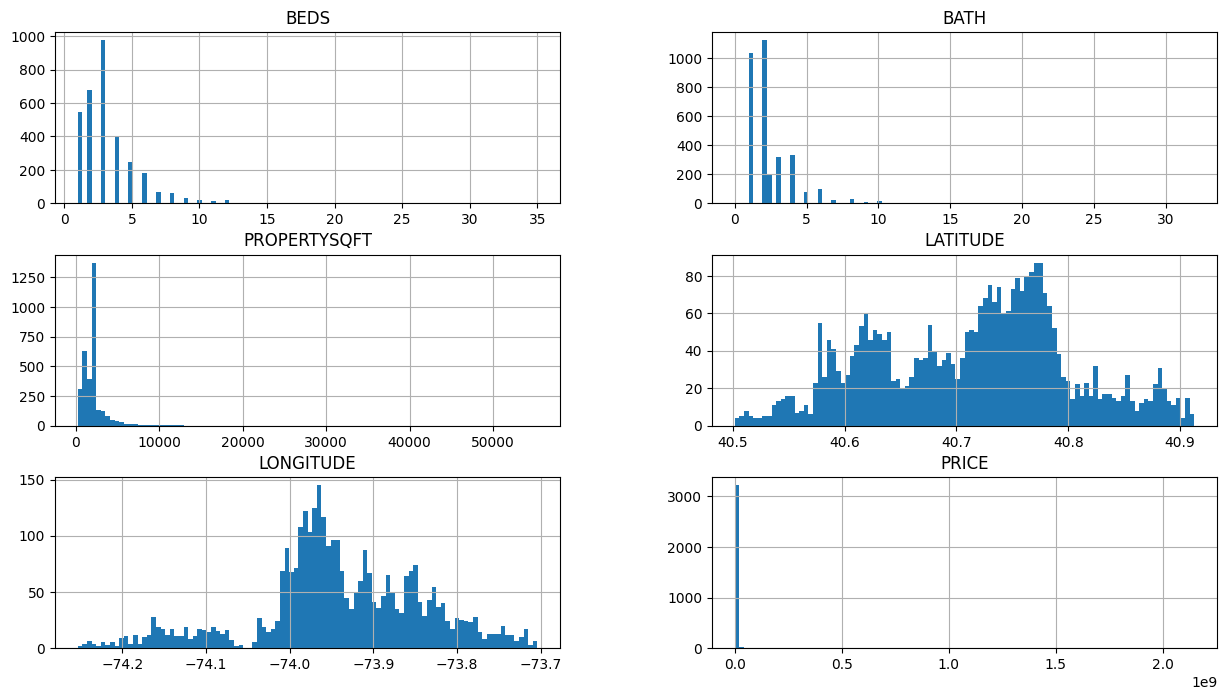

In [403]:
# rozkład zmiennych numerycznych 
df_learning.hist(bins=100, figsize=(15,8))

array([[<Axes: title={'center': 'BEDS'}>,
        <Axes: title={'center': 'BATH'}>],
       [<Axes: title={'center': 'PROPERTYSQFT'}>,
        <Axes: title={'center': 'PRICE'}>]], dtype=object)

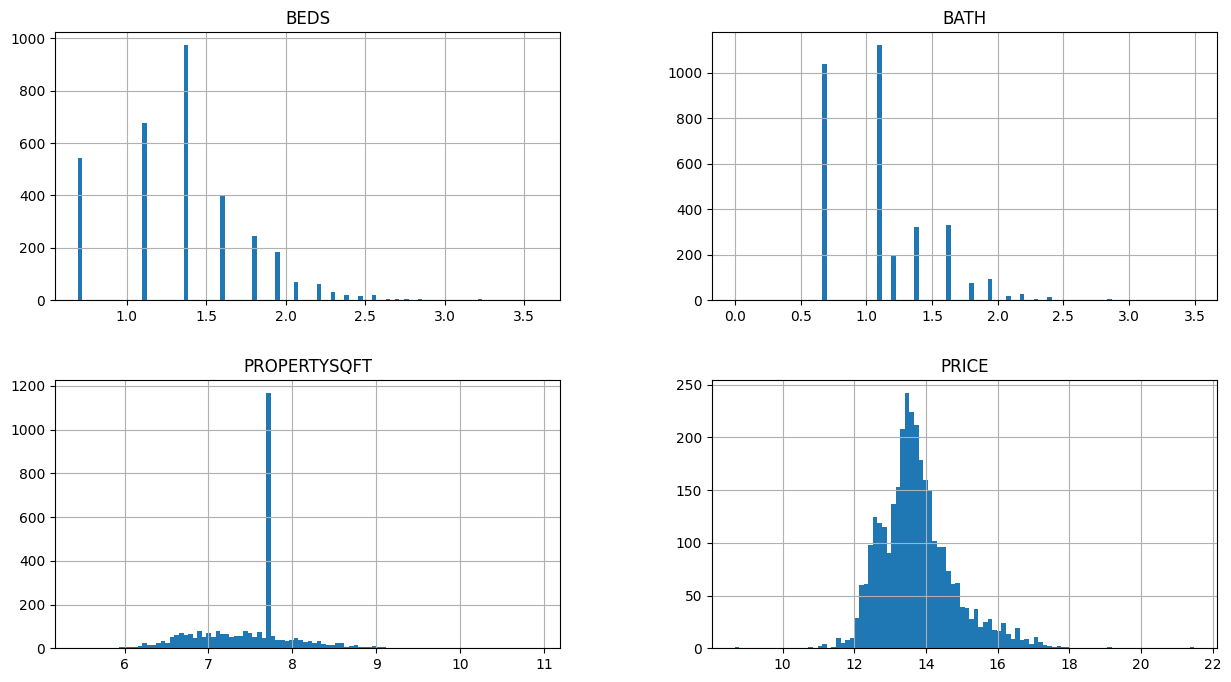

In [404]:
# sprawdzmy rozkłady najważniejszych dla nas zmiennych numerycznych, z przeskalowaniem logarytmicznym (naturalnym zwiększonym o 1)
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "PRICE"]]
np.log1p(df_num).hist(bins=100, figsize=(15,8))

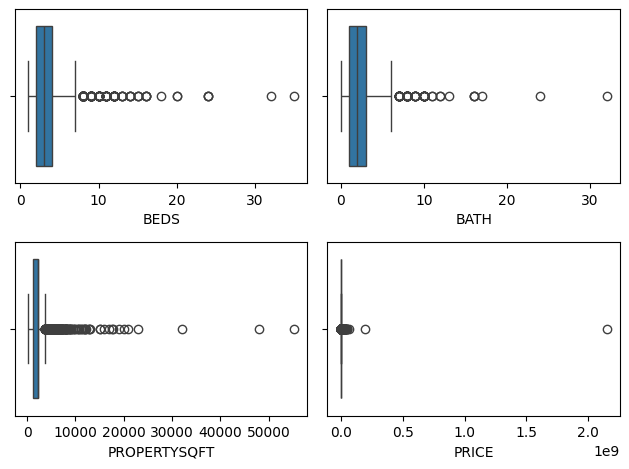

In [405]:
# analiza jako boxploty
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    #sns.boxplot(df_num, x= np.log1p(df_num[col]), ax= axes[i])
    sns.boxplot(df_num, x= df_num[col], ax= axes[i])
plt.tight_layout() 
plt.show()

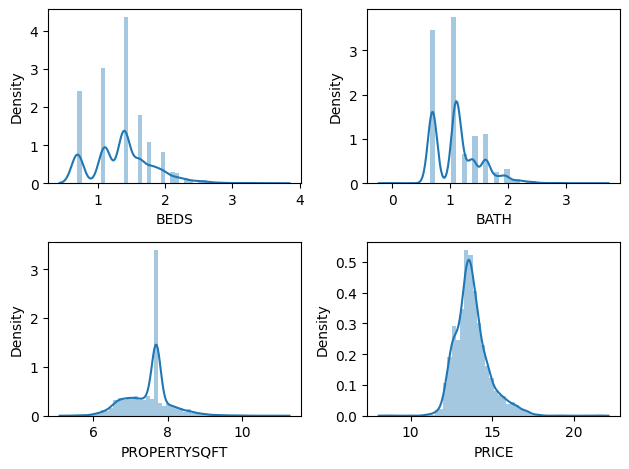

In [406]:
# jako gęstości
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.distplot(np.log1p(df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

In [407]:
# usuńmy outliery z Price, gdzie rozkład jest zbliżony do normalnego (zasada 3 sigm)
print(f'Przed: { df_learning.shape[0]}')
df_learning['Price_log'] = np.log1p(df_learning['PRICE'])
mean_pr = df_learning['Price_log'].mean()
std_pr = df_learning['Price_log'].std()
lower = mean_pr - 3 * std_pr
upper = mean_pr + 3 * std_pr
df_learning = df_learning[(df_learning['Price_log'] >= lower) & (df_learning['Price_log'] <= upper)]
print(f'Po: { df_learning.shape[0]}')

Przed: 3257
Po: 3221


In [408]:
#usuwamy outliery ze zmiennych BEDS i BATH
print('Wejściowy rozmiar: ', df_learning.shape[0])

upper_lim = df_learning['BEDS'].quantile(0.95)
lower_lim = df_learning['BEDS'].quantile(0.05)
df_learning = df_learning[(df_learning['BEDS'] <= upper_lim) & (df_learning['BEDS'] >= lower_lim)]

print('Wyjściowy rozmiar: ', df_learning.shape[0])

Wejściowy rozmiar:  3221
Wyjściowy rozmiar:  3117


In [409]:
print('Wejściowy rozmiar: ', df_learning.shape[0])

upper_lim = df_learning['BATH'].quantile(0.95)
lower_lim = df_learning['BATH'].quantile(0.05)
df_learning = df_learning[(df_learning['BATH'] <= upper_lim) & (df_learning['BATH'] >= lower_lim)]

print('Wyjściowy rozmiar: ', df_learning.shape[0])

Wejściowy rozmiar:  3117
Wyjściowy rozmiar:  2966


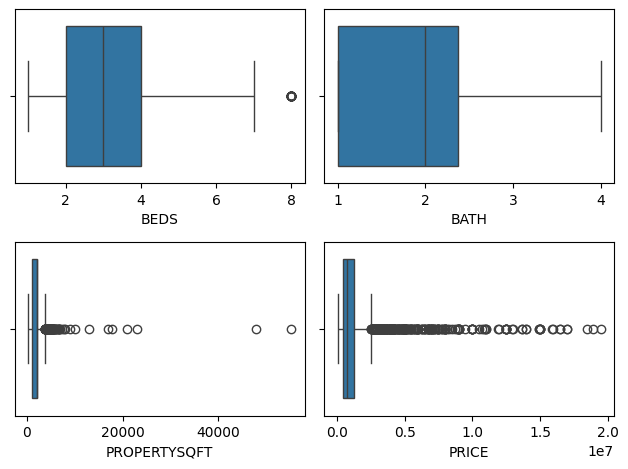

In [410]:
# Dane po usunięciu outlierów
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "PRICE"]]

fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num, x= (df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

In [411]:
# TO mi nie działa idk co tam jest
'''from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(12, 7))
m = Basemap(projection='merc', llcrnrlat=min(df_learning.LATITUDE), urcrnrlat= max(df_learning.LATITUDE), llcrnrlon=min(df_learning.LONGITUDE), urcrnrlon=max(df_learning.LONGITUDE), resolution='h')

m.drawcoastlines()
m.drawcountries()
x, y = m(df_learning.LONGITUDE, df_learning.LATITUDE)

sns.scatterplot(x=x, y=y, hue= np.log1p(df_learning["PRICE"]), palette= "coolwarm")

plt.legend(title= "PRICE [log1p]")
plt.show()'''

'from mpl_toolkits.basemap import Basemap\n\nplt.figure(figsize=(12, 7))\nm = Basemap(projection=\'merc\', llcrnrlat=min(df_learning.LATITUDE), urcrnrlat= max(df_learning.LATITUDE), llcrnrlon=min(df_learning.LONGITUDE), urcrnrlon=max(df_learning.LONGITUDE), resolution=\'h\')\n\nm.drawcoastlines()\nm.drawcountries()\nx, y = m(df_learning.LONGITUDE, df_learning.LATITUDE)\n\nsns.scatterplot(x=x, y=y, hue= np.log1p(df_learning["PRICE"]), palette= "coolwarm")\n\nplt.legend(title= "PRICE [log1p]")\nplt.show()'

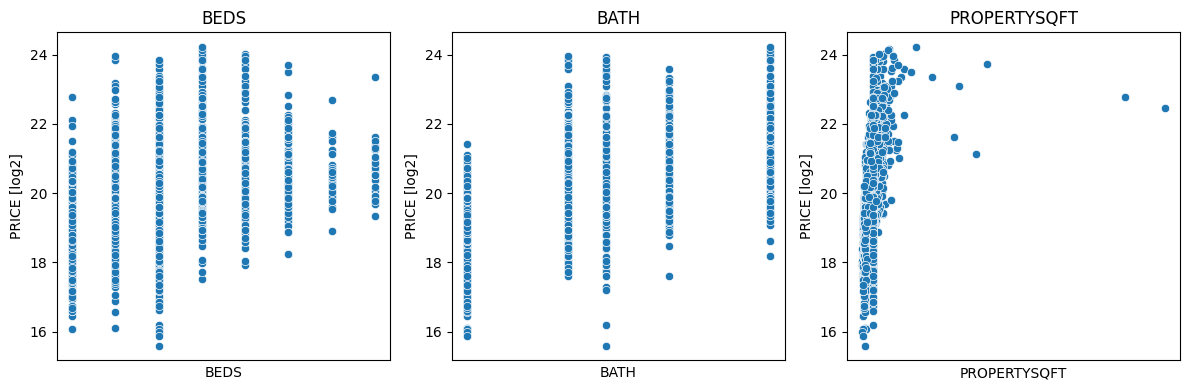

In [412]:
#Florini opisz pls
fig, axes = plt.subplots(1,3, figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(df_num.columns[df_num.columns != "PRICE"]):
    sns.scatterplot(data=df_num, x= col, y= np.log2(df_num["PRICE"]), ax= axes[i])
    axes[i].set_title(col)
    axes[i].set_xticks([])
    axes[i].set_ylabel("PRICE [log2]")

plt.tight_layout()
plt.show()

<Axes: >

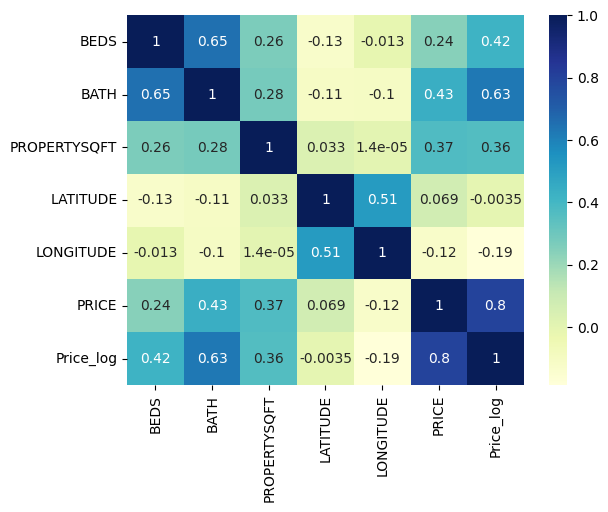

In [413]:
# korelacja danych numerycznych
sns.heatmap(df_learning.corr(), annot=True, cmap="YlGnBu")

In [414]:
cat_col = [col for col in df_learning.columns if df_learning[col].dtype == 'object']
df_learning[cat_col].nunique()
# widać ze kolumny Address, Main_Address, Long_Name i Formatted_Address mają bardzo dużo unikalnych obserwacji, co przy zmiennych kategorycznych
# moze nie działać najlepiej na model = pomijalne


BROKERTITLE                     841
TYPE                             12
ADDRESS                        2966
STATE                           278
MAIN_ADDRESS                   2966
ADMINISTRATIVE_AREA_LEVEL_2      22
LOCALITY                         11
SUBLOCALITY                      20
STREET_NAME                     154
LONG_NAME                      2006
FORMATTED_ADDRESS              2953
dtype: int64

In [415]:
df_learning = df_learning.drop(['ADDRESS', 'MAIN_ADDRESS', 'LONG_NAME', 'FORMATTED_ADDRESS'], axis = 1)

In [416]:
#sprawdzamy rozkład wartości w zmiennych kategorycznych
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME"]

for col in cols:
    print(df_learning[col].value_counts())
    print(end= "\n________________________________________________________________\n")
    

Brokered by COMPASS                              286
Brokered by Douglas Elliman - 575 Madison Ave     61
Brokered by Brown Harris Stevens                  52
Brokered by Corcoran East Side                    51
Brokered by RE MAX Edge                           44
                                                ... 
Brokered by Nella Management Llc                   1
Brokered by First Home Equity Realty               1
Brokered by E-House Realty of Avenue U Inc         1
Brokered by NYC Empire Realty Inc.                 1
Brokered by Engel & V�������                       1
Name: BROKERTITLE, Length: 841, dtype: int64

________________________________________________________________
Co-op for sale                955
House for sale                642
Condo for sale                579
Multi-family home for sale    363
Pending                       158
Townhouse for sale            149
Contingent                     60
Land for sale                  31
For sale                       13


In [417]:
# Brokers
sum(df_learning['BROKERTITLE'].value_counts() == 1)
# mamy az 471 brokerów którzy występują raz, zamieńmy je na others

474

In [418]:
df_learning['BROKERTITLE'] = df_learning['BROKERTITLE'].map(lambda x: 'Others' if df_learning['BROKERTITLE'].value_counts()[x] == 1 else x)
df_learning['BROKERTITLE'].value_counts()

Others                                           474
Brokered by COMPASS                              286
Brokered by Douglas Elliman - 575 Madison Ave     61
Brokered by Brown Harris Stevens                  52
Brokered by Corcoran East Side                    51
                                                ... 
Brokered by RE MAX Boutique Realty                 2
Brokered by VYLLA Homes                            2
Brokered by ROCKAWAY PROPERTIES                    2
Built by Toll Brothers                             2
Brokered by Geo Real Estate Group Inc              2
Name: BROKERTITLE, Length: 368, dtype: int64

In [419]:
# to samo, ale plus MEAN_PRICE dla kazdej kategorii
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME"]

for col in cols:
    df_tmp = df_learning[[col, "PRICE"]]
    df_tmp = pd.DataFrame(df_tmp.groupby(col)["PRICE"].mean()).reset_index()
    df_tmp.columns = [col, "MEAN_PRICE"]
    
    df_count = pd.DataFrame(df_learning[col].value_counts()).reset_index()
    df_count.columns = [col, "count"]
    df_tmp = pd.merge(df_tmp, df_count, on= col).sort_values("MEAN_PRICE", ascending=False).reset_index(drop= True)
    print(df_tmp, end= "\n________________________________________________________________\n")   

                                           BROKERTITLE    MEAN_PRICE  count
0          Brokered by Garfield, Leslie J. & Co., Inc.  7.298333e+06      3
1         Brokered by Douglas Elliman - 690 Washington  5.147500e+06      2
2                                  Brokered by Serhant  4.218067e+06     30
3                  Brokered by Coldwell Banker Warburg  4.097500e+06      8
4                  Brokered by Andrew Lichtenstein Inc  3.925000e+06      2
..                                                 ...           ...    ...
363                      Brokered by GOLDEN REAL CORP.  2.290000e+05      2
364  Brokered by Tudor Realty Services Corp. - Tudo...  2.195000e+05      2
365                   Brokered by R Jaundoo Realty Llc  2.066667e+05      3
366                     Brokered by Utopia Real Estate  2.014333e+05      3
367                      Brokered by Houlihan Lawrence  1.613330e+05      3

[368 rows x 3 columns]
________________________________________________________________

In [420]:
# Podział zmiennej docelowej ciągłej na kategorie
# mogą być błędy juz w dół
quantiles = df_learning['PRICE'].quantile([0.25, 0.5, 0.75])

df_learning['PRICE_Category'] = pd.cut(df_learning['PRICE'], bins=[-float('inf'), quantiles[0.25], quantiles[0.5], quantiles[0.75], float('inf')], labels=['Cheap', 'Mid-cheap', 'Mid-expensive', 'Expensive'])
df_learning = df_learning.drop(['PRICE', 'Price_log', 'LATITUDE', 'LONGITUDE'], axis = 1)
df_learning

,BROKERTITLE,TYPE,BEDS,BATH,PROPERTYSQFT,STATE,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,PRICE_Category
3787,Brokered by COMPASS,Co-op for sale,2,1.0,2184.207862,"Manhattan, NY 10025",New York,New York County,New York,Manhattan,Mid-cheap
1785,Brokered by Keystone Realty USA Corp,Multi-family home for sale,5,2.0,2184.207862,"Far Rockaway, NY 11691",United States,New York,Queens County,Queens,Mid-expensive
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,1,1.0,2184.207862,"Rego Park, NY 11374",United States,New York,Queens County,Queens,Cheap
3160,Brokered by Ben Bay Realty Company of Staten I...,House for sale,3,2.0,1320.000000,"Brooklyn, NY 11229",United States,New York,Kings County,Brooklyn,Mid-cheap
2407,Brokered by Bond New York- Columbus Circle,Co-op for sale,1,1.0,2184.207862,"New York, NY 10025",New York,New York County,New York,Manhattan,Mid-cheap
...,...,...,...,...,...,...,...,...,...,...,...
2414,Brokered by BESMATCH REAL ESTATE,Co-op for sale,1,1.0,850.000000,"Bronx, NY 10463",Bronx County,The Bronx,Riverdale,Oxford Avenue,Cheap
3803,Others,Condo for sale,3,3.0,2241.000000,"New York, NY 10023",New York County,New York,Manhattan,Central Park West,Expensive
539,Brokered by COMPASS,House for sale,4,4.0,2700.000000,"Queens, NY 11693",United States,New York,Queens County,Queens,Mid-expensive
2775,Brokered by COMPASS,Townhouse for sale,5,4.0,6060.000000,"Manhattan, NY 10003",United States,New York,New York County,New York,Expensive


In [422]:
# podział na zbiór do nauki i zbiór docelowy
X = df_learning.drop('PRICE_Category', axis = 1)
y = df_learning['PRICE_Category']

In [430]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#encoding zmiennych kategorycznych
onehot_encoder = OneHotEncoder()
to_encode = ['BROKERTITLE',	'TYPE',	'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2',	'LOCALITY',	'SUBLOCALITY',	'STREET_NAME']
column_transformer = ColumnTransformer(
    [('onehot_encoder', onehot_encoder, to_encode)],
    remainder='passthrough'  
)
X_encoded = column_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state= 42)

In [426]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
# porównanie kilku modeli i ich skuteczności, ale trzeba pozmieniać bo nie oddaje lekko ponad 60%

In [446]:
model = LogisticRegression()
model.fit(X=X_train, y= y_train)
y_predicted = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)
class_report = classification_report(y_test, y_predicted)
print(class_report)

0.6060606060606061
               precision    recall  f1-score   support

        Cheap       0.74      0.80      0.77       157
    Expensive       0.68      0.78      0.73       156
    Mid-cheap       0.45      0.43      0.44       144
Mid-expensive       0.47      0.37      0.42       137

     accuracy                           0.61       594
    macro avg       0.59      0.60      0.59       594
 weighted avg       0.59      0.61      0.60       594



In [445]:
model1 = DecisionTreeClassifier()
model1.fit(X=X_train, y= y_train)
y_predicted1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_predicted1)
display(accuracy1)
class_report1 = classification_report(y_test, y_predicted1)
print(class_report1)

0.6245791245791246

               precision    recall  f1-score   support

        Cheap       0.84      0.76      0.80       157
    Expensive       0.72      0.70      0.71       156
    Mid-cheap       0.50      0.49      0.50       144
Mid-expensive       0.45      0.53      0.48       137

     accuracy                           0.62       594
    macro avg       0.63      0.62      0.62       594
 weighted avg       0.64      0.62      0.63       594



In [437]:
model2 = GradientBoostingClassifier()
model2.fit(X=X_train, y= y_train)
y_predicted2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_predicted2)
display(accuracy2)
class_report2 = classification_report(y_test, y_predicted2)
print(class_report2)

0.6464646464646465

               precision    recall  f1-score   support

        Cheap       0.84      0.78      0.81       157
    Expensive       0.73      0.75      0.74       156
    Mid-cheap       0.51      0.55      0.53       144
Mid-expensive       0.49      0.47      0.48       137

     accuracy                           0.65       594
    macro avg       0.64      0.64      0.64       594
 weighted avg       0.65      0.65      0.65       594



In [436]:
model3 = SVC()
model3.fit(X=X_train, y= y_train)
y_predicted3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_predicted2)
display(accuracy3)
class_report3 = classification_report(y_test, y_predicted3)
print(class_report3)

0.6430976430976431

               precision    recall  f1-score   support

        Cheap       0.60      0.43      0.50       157
    Expensive       0.79      0.26      0.39       156
    Mid-cheap       0.34      0.30      0.32       144
Mid-expensive       0.26      0.58      0.36       137

     accuracy                           0.39       594
    macro avg       0.50      0.39      0.39       594
 weighted avg       0.51      0.39      0.40       594

